DATA UNDERSTANDING


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
from scipy.stats import normaltest, shapiro, anderson

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Basket_dataset.csv')

In [ ]:
df.head(10)

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
5,4941,14/02/2015,rolls/buns
6,4501,08/05/2015,other vegetables
7,3803,23/12/2015,pot plants
8,2762,20/03/2015,whole milk
9,4119,12/02/2015,tropical fruit


Distribution Analysis

In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.shape

(38765, 3)

In [ ]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

Date needs to be datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

Lets work on duplicates, for this problem statement, we only consider it a duplicate if all three columns have same value

In [ ]:
duplicates = df[df.duplicated(subset=['Member_number', 'Date', 'itemDescription'], keep=False)]
sorted_duplicates = duplicates.sort_values(by=list(duplicates.columns))
print(sorted_duplicates)


       Member_number       Date itemDescription
33098           1003 2014-02-27      rolls/buns
37649           1003 2014-02-27      rolls/buns
15099           1005 2014-09-01      rolls/buns
31248           1005 2014-09-01      rolls/buns
7532            1006 2015-06-14     frankfurter
...              ...        ...             ...
24043           4981 2015-10-01       margarine
8109            4988 2015-10-29      rolls/buns
24258           4988 2015-10-29      rolls/buns
33585           4992 2014-02-24       margarine
38136           4992 2014-02-24       margarine

[1491 rows x 3 columns]


In [ ]:
df = df.drop_duplicates(subset=['Member_number', 'Date', 'itemDescription'])


In [ ]:
df.shape

(38006, 3)

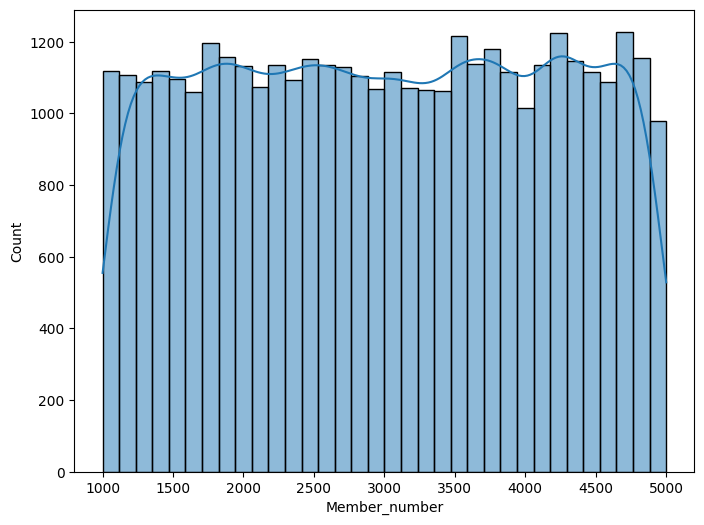

count    38006.000000
mean      3003.361390
std       1153.659151
min       1000.000000
25%       2001.000000
50%       3005.000000
75%       4007.000000
max       5000.000000
Name: Member_number, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Member_number'], kde=True)
plt.show()

print(df['Member_number'].describe())


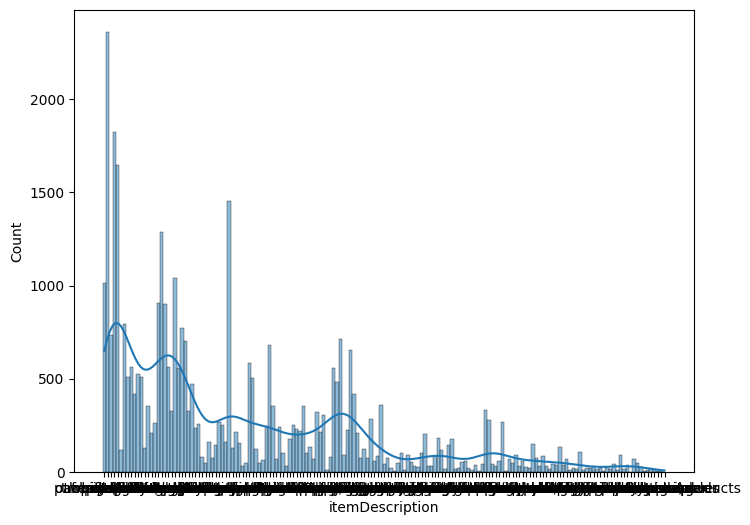

count          38006
unique           167
top       whole milk
freq            2363
Name: itemDescription, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['itemDescription'], kde=True)
plt.show()

print(df['itemDescription'].describe())


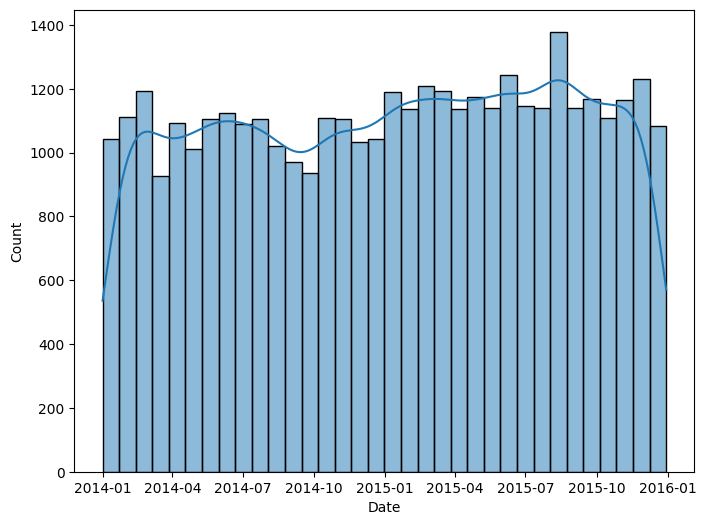

count                   38006
unique                    728
top       2015-01-21 00:00:00
freq                       96
first     2014-01-01 00:00:00
last      2015-12-30 00:00:00
Name: Date, dtype: object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Date'], kde=True)
plt.show()

print(df['Date'].describe())


Distribution of Purchases over time using Line plot

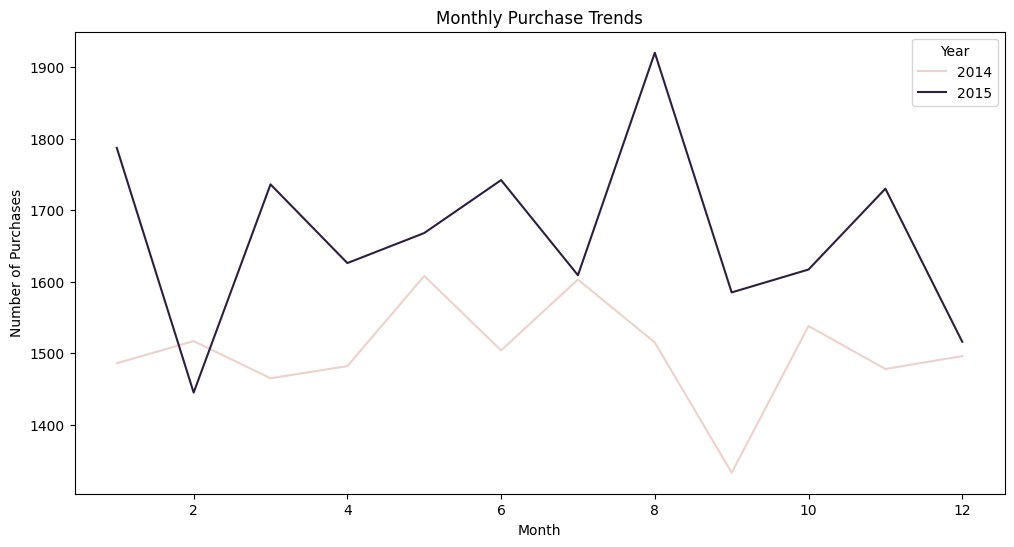

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Date' is in datetime format
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

monthly_purchases = df.groupby(['Year', 'Month']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Count', hue='Year', data=monthly_purchases)
plt.title('Monthly Purchase Trends')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.legend(title='Year')
plt.show()


Item Frequency - Bar Plot

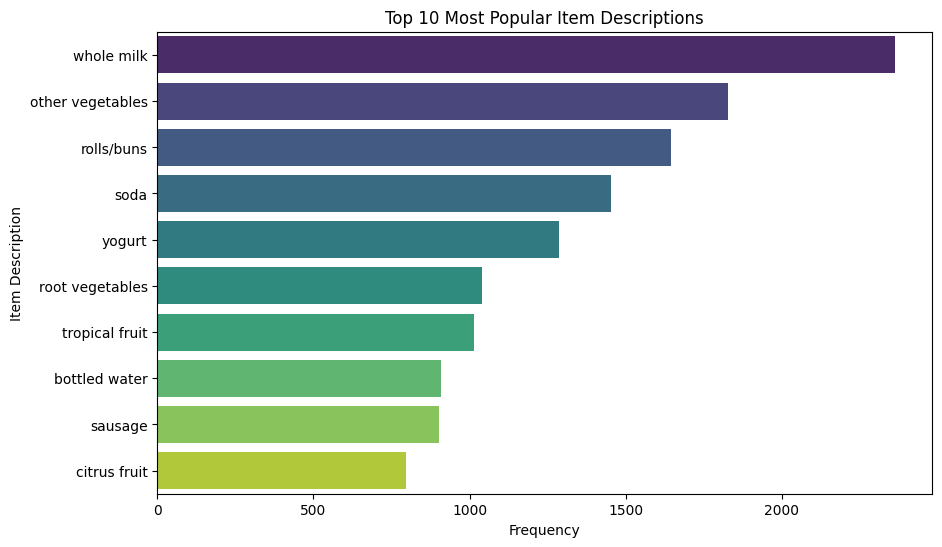

In [ ]:
top_items = df['itemDescription'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette='viridis')
plt.title('Top 10 Most Popular Item Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Item Description')
plt.show()


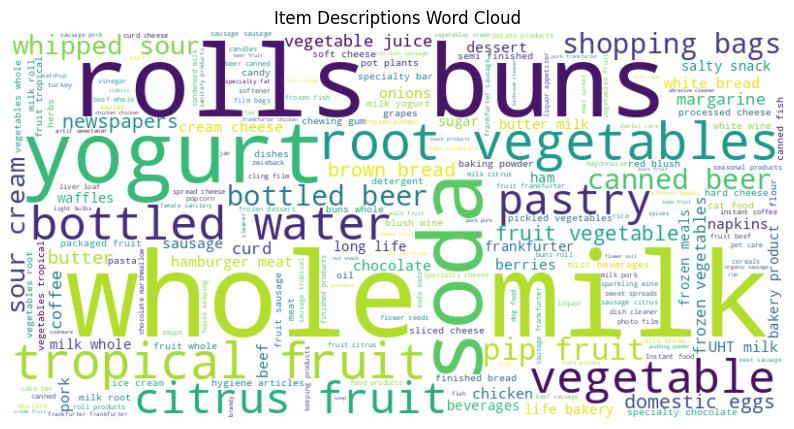

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

item_descriptions = ' '.join(df['itemDescription'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(item_descriptions)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Item Descriptions Word Cloud')
plt.show()


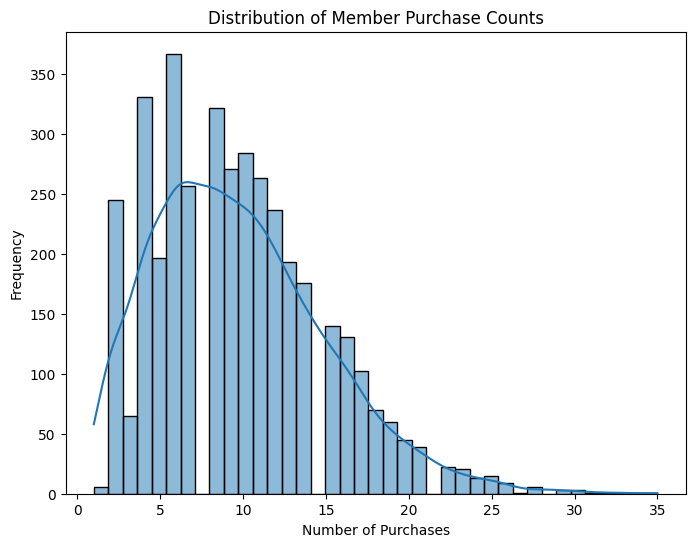

In [ ]:
member_purchase_counts = df['Member_number'].value_counts()
plt.figure(figsize=(8, 6))
sns.histplot(member_purchase_counts, kde=True)
plt.title('Distribution of Member Purchase Counts')
plt.xlabel('Number of Purchases')
plt.ylabel('Frequency')
plt.show()


RFM SEGMENTATION

In [ ]:
max(df['Date'])

Timestamp('2015-12-30 00:00:00')

In [ ]:
day = '2016-01-01'
day = pd.to_datetime(day)
recency = df.groupby(["Member_number"]).agg({"Date": lambda x: ((day-x.max()).days)})

In [ ]:
recency.shape

(3898, 1)

In [ ]:
frequency = df['Member_number'].value_counts()
freq = pd.DataFrame(frequency)


In [ ]:
freq.shape

(3898, 1)

In [ ]:
type(freq)

pandas.core.frame.DataFrame

In [ ]:
df

,Member_number,Date,itemDescription,Year,Month
0,1808,2015-07-21,tropical fruit,2015,7
1,2552,2015-05-01,whole milk,2015,5
2,2300,2015-09-19,pip fruit,2015,9
3,1187,2015-12-12,other vegetables,2015,12
4,3037,2015-01-02,whole milk,2015,1
...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8
38761,2022,2014-02-23,candy,2014,2
38762,1097,2014-04-16,cake bar,2014,4
38763,1510,2014-03-12,fruit/vegetable juice,2014,3


In [ ]:
columns_to_drop = ['Year', 'Month']
df = df.drop(columns=columns_to_drop)


In [ ]:
df['Quantity'] = df.groupby(['Member_number', 'Date'])['itemDescription'].transform('nunique')


In [ ]:
df

,Member_number,Date,itemDescription,Quantity
0,1808,2015-07-21,tropical fruit,3
1,2552,2015-05-01,whole milk,3
2,2300,2015-09-19,pip fruit,3
3,1187,2015-12-12,other vegetables,3
4,3037,2015-01-02,whole milk,3
...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,3
38761,2022,2014-02-23,candy,3
38762,1097,2014-04-16,cake bar,3
38763,1510,2014-03-12,fruit/vegetable juice,3


In [ ]:
agg_df = df.groupby(['Member_number', 'Date']).agg({
    'itemDescription': ', '.join,
    'Quantity': 'first'
}).reset_index()

agg_df.head(10)

,Member_number,Date,itemDescription,Quantity
0,1000,2014-06-24,"whole milk, pastry, salty snack",3
1,1000,2015-03-15,"sausage, whole milk, semi-finished bread, yogurt",4
2,1000,2015-05-27,"soda, pickled vegetables",2
3,1000,2015-07-24,"canned beer, misc. beverages",2
4,1000,2015-11-25,"sausage, hygiene articles",2
5,1001,2014-07-02,"sausage, whole milk, rolls/buns",3
6,1001,2014-12-12,"whole milk, soda",2
7,1001,2015-01-20,"frankfurter, soda, whipped/sour cream",3
8,1001,2015-02-05,"frankfurter, curd",2
9,1001,2015-04-14,"beef, white bread",2


In [ ]:
fixed_price = 1.0

# Calculate the monetary value by multiplying 'Quantity' by the fixed price
agg_df['Monetary_Value'] = agg_df['Quantity'] * fixed_price

agg_df.head(10)

,Member_number,Date,itemDescription,Quantity,Monetary_Value
0,1000,2014-06-24,"whole milk, pastry, salty snack",3,3.0
1,1000,2015-03-15,"sausage, whole milk, semi-finished bread, yogurt",4,4.0
2,1000,2015-05-27,"soda, pickled vegetables",2,2.0
3,1000,2015-07-24,"canned beer, misc. beverages",2,2.0
4,1000,2015-11-25,"sausage, hygiene articles",2,2.0
5,1001,2014-07-02,"sausage, whole milk, rolls/buns",3,3.0
6,1001,2014-12-12,"whole milk, soda",2,2.0
7,1001,2015-01-20,"frankfurter, soda, whipped/sour cream",3,3.0
8,1001,2015-02-05,"frankfurter, curd",2,2.0
9,1001,2015-04-14,"beef, white bread",2,2.0


In [ ]:
monetary = agg_df.groupby(['Member_number'])[["Monetary_Value"]].sum()

In [ ]:
monetary.shape

(3898, 1)

In [ ]:
RFM = pd.concat([recency, freq, monetary],axis=1)
recency.columns=["Recency"]
freq.columns=["Frequency"]
monetary.columns=["Monetary"]

In [ ]:
RFM

,Recency,Frequency,Monetary
1000,37,13,13.0
1001,262,12,12.0
1002,124,8,8.0
1003,91,7,7.0
1004,323,21,21.0
...,...,...,...
4996,38,10,10.0
4997,5,6,6.0
4998,79,2,2.0
4999,6,16,16.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)

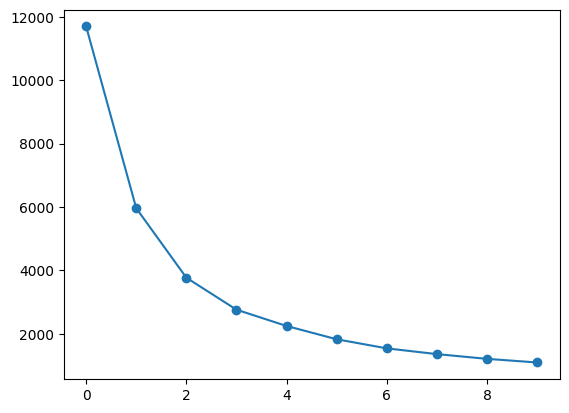

In [ ]:
from sklearn.cluster import KMeans

inertia = []
for i in np.arange(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled)
  inertia.append(kmeans.inertia_)

plt.plot(inertia,marker="o")

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled)
RFM["Clusters"] = (kmeans.labels_+1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters
1000,37,13,13.0,1
1001,262,12,12.0,3
1002,124,8,8.0,3
1003,91,7,7.0,3
1004,323,21,21.0,1
...,...,...,...,...
4996,38,10,10.0,3
4997,5,6,6.0,3
4998,79,2,2.0,3
4999,6,16,16.0,1


In [ ]:
group = RFM.groupby(["Clusters"])["Recency","Frequency","Monetary"].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
1,107.491928,16.536562,16.536562
2,421.988248,5.213675,5.213675
3,119.640126,8.231011,8.231011


In [ ]:
def func(row):
  if row["Clusters"] == 2 :
    return 'Avg_Customers'
  elif row["Clusters"] == 1:
    return 'Whales'
  else:
    return 'Lapsed Customers'

In [ ]:
RFM["Category"] = RFM.apply(func,axis=1)

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters,Category
1000,37,13,13.0,1,Whales
1001,262,12,12.0,3,Lapsed Customers
1002,124,8,8.0,3,Lapsed Customers
1003,91,7,7.0,3,Lapsed Customers
1004,323,21,21.0,1,Whales
...,...,...,...,...,...
4996,38,10,10.0,3,Lapsed Customers
4997,5,6,6.0,3,Lapsed Customers
4998,79,2,2.0,3,Lapsed Customers
4999,6,16,16.0,1,Whales


In [ ]:
result = RFM["Category"].value_counts()

In [ ]:
result

,Category
Lapsed Customers,1909
Whales,1053
Avg_Customers,936


<Axes: >

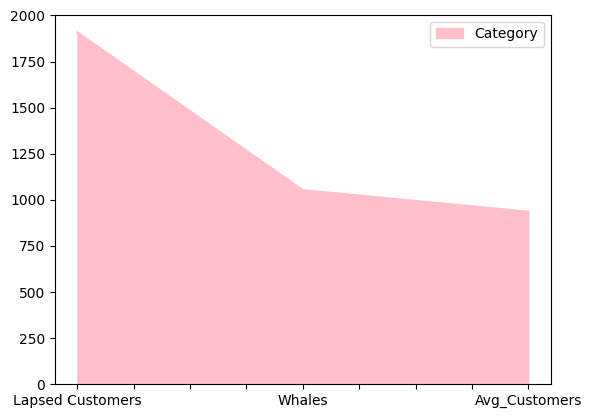

In [ ]:
result.plot(kind='area',color=["Pink"])